# SUDHIR SHARMA
# ID NO - 12041500
# CSE
# CS 550 ASSIGNMENT_1_PARTB

# **Part 2: Life Expectancy (WHO)**


Life expectancy is the number of years that an individual is expected to live as determined by statistics. It is the age to which an average person is expected to live, based on the person’s sex, health factors, and other demographic data.Population ageing has become an important developmental issue that requires urgent action.



##**Problem Statement**

Part 2: Life Expectancy (WHO)

##**Objectives**
The data was collected from WHO and the United Nations website. The objective of this practice is to

A. Feature Selection: Do various predicting factors which have been chosen initially really affect the 
Life expectancy? What are the predicting variables actually affecting life expectancy?

B. Should a country having a lower life expectancy value (<65) increase its healthcare expenditure in order to improve its average lifespan?

C. How do Infant and Adult mortality rates affect life expectancy?

D. Does Life Expectancy have positive or negative correlation with eating habits, lifestyle, exercise, 
smoking, drinking alcohol etc.

E. What is the impact of schooling on the lifespan of humans?
F. Does Life Expectancy have a positive or negative relationship with drinking alcohol?

G. Do densely populated countries tend to have lower life expectancy?

H. What is the impact of Immunization coverage on life Expectancy?

(Kaggle:https://www.kaggle.com/datasets/kumarajarshi/life-expectancywho?select=Life+Expectancy+Data.csv)


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


# Reading data 

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")
df


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
tran=df

# Visualizing the data

In [4]:
# number of rows and columns
df.shape

(2938, 22)

In [5]:
# preview first 5 rows
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
# preview last 5 rows
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [7]:
# traning the datatype of each column
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

# Data Cleaning and Visualization

## **Standardising column names**

In [8]:
# fixing messy column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# preview column names to see changes made
print(df.columns)


Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


## **Duplicated entries**

In [9]:
# tran for duplicated rows 
df.duplicated().sum()

# none found

0

## **Null Values**

In [10]:
# tran for null values
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [11]:
# select a list of all countries from the country column
country_list = df.country.unique()

# create a list of the other columns with null values that need to be interpolated
interpolate_list =['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 
                   'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under-five_deaths', 
                   'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 
                   'thinness__1-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 
                   'schooling']

# interpolate the different columns for each country separately
for country in country_list:
    df.loc[df['country'] == country,interpolate_list] = df.loc[df['country'] == country,interpolate_list].interpolate()

In [12]:
# drop the remaining null values 
df.dropna(inplace=True)
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [13]:
#Exporting the already cleaned dataset
df1=df.copy()
df1.to_csv('cleaned.csv')

## **Outliers**

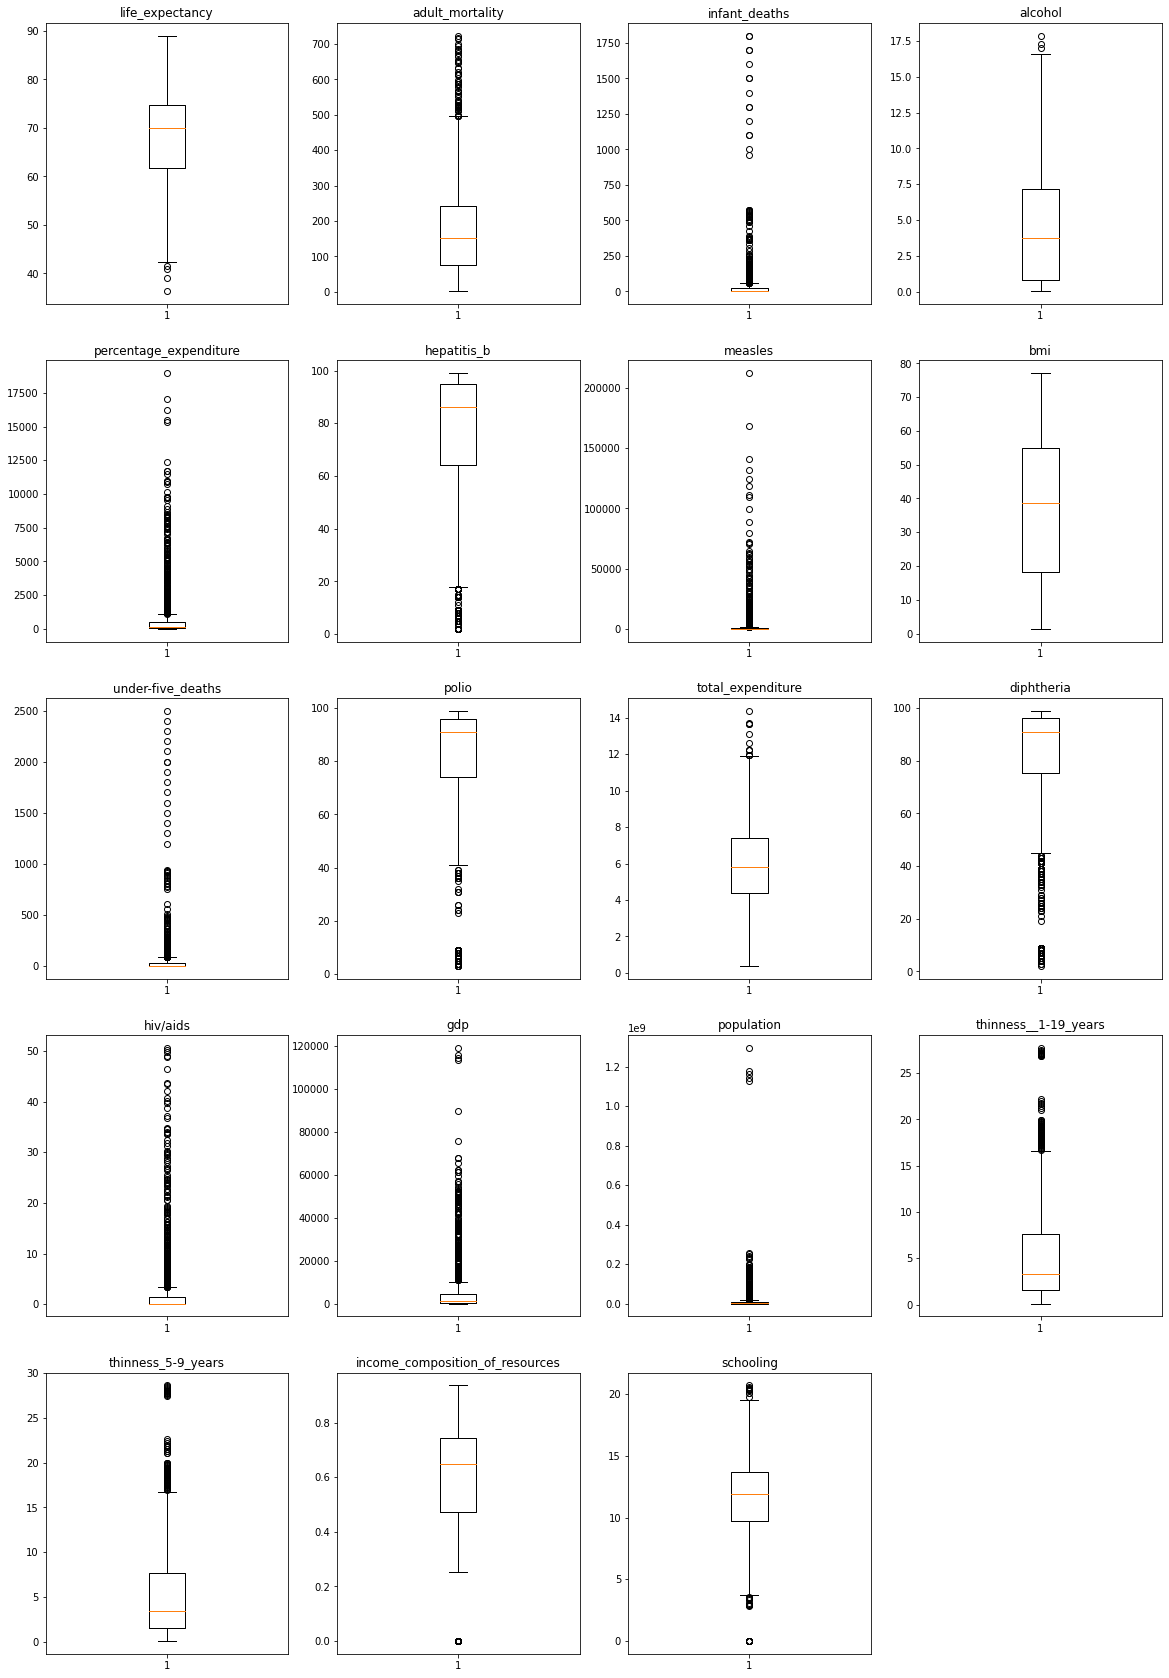

In [14]:
# save the column names onto a dictionary
columns_dict={'life_expectancy': 1, 'adult_mortality': 2, 'infant_deaths': 3, 'alcohol': 4, 
                   'percentage_expenditure': 5, 'hepatitis_b': 6, 'measles': 7, 'bmi': 8, 'under-five_deaths': 9, 
                   'polio': 10, 'total_expenditure': 11, 'diphtheria': 12, 'hiv/aids': 13, 'gdp': 14, 'population': 15, 
                   'thinness__1-19_years': 16, 'thinness_5-9_years': 17, 'income_composition_of_resources': 18, 
                   'schooling': 19}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(df[variable])
  plt.title(variable)

plt.show()

## **Anomalies**

In [15]:
# traning for anomalies

# find quartile ranges for the column sum of bluecars_taken
q1_life_e = df['life_expectancy'].quantile(.25)
q3_life_e = df['life_expectancy'].quantile(.75)

# calculating inter-quartile range using values from above
iqr_life_e = q3_life_e - q1_life_e

# another way is to find quantiles using the percentiles from the numpy library
q1_l_e, q3_l_e = np.percentile(df['life_expectancy'], [25, 75]) 
# IQR
iqr_l_e = q3_l_e - q1_l_e

# compare if the two values are similar
print(iqr_life_e, iqr_l_e)

13.0 13.0


# B. Data Scaling

In [16]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
train=df
train2=train
train2["life_expectancy"]=scalar.fit_transform(train[["life_expectancy"]])
train2["adult_mortality"]=scalar.fit_transform(train[["adult_mortality"]])
train2["infant_deaths"]=scalar.fit_transform(train[["infant_deaths"]])
train2["alcohol"]=scalar.fit_transform(train[["alcohol"]])
train2['measles']=scalar.fit_transform(train[['measles']])
train2["gdp"]=scalar.fit_transform(train[["gdp"]])
train2["population"]=scalar.fit_transform(train[["population"]])





In [18]:
train2.head(10)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,-0.307275,0.667352,0.182893,-1.118195,71.279624,65.0,-0.130219,19.1,83,6.0,8.16,65.0,0.1,-0.418898,0.310590,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,-0.832833,0.728150,0.197308,-1.118195,73.523582,62.0,-0.184932,18.6,86,58.0,8.18,62.0,0.1,-0.416420,-0.204305,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,-0.832833,0.705351,0.211722,-1.118195,73.219243,64.0,-0.190057,18.1,89,62.0,8.13,64.0,0.1,-0.414761,0.279692,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,-0.874054,0.735750,0.233344,-1.118195,78.184215,67.0,0.004747,17.6,93,67.0,8.52,67.0,0.1,-0.411431,-0.152377,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,-0.904969,0.758549,0.247758,-1.118195,7.097109,68.0,0.023426,17.2,97,68.0,7.87,68.0,0.1,-0.464265,-0.163448,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,-0.946189,0.788948,0.269380,-1.118195,79.679367,66.0,-0.061207,16.7,102,66.0,9.20,66.0,0.1,-0.421593,-0.164919,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,-0.966799,0.804147,0.291001,-1.118195,56.762217,63.0,0.010863,16.2,106,63.0,9.42,63.0,0.1,-0.430953,-0.204972,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,-1.018325,0.849746,0.312623,-1.113164,25.873925,64.0,-0.093440,15.7,110,64.0,8.33,64.0,0.1,-0.437272,-0.167288,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,-1.080155,0.910543,0.327037,-1.115680,10.910156,63.0,-0.131293,15.2,113,63.0,6.73,63.0,0.1,-0.437579,0.200862,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,-1.100765,0.910543,0.341452,-1.113164,17.171518,64.0,-0.061124,14.7,116,58.0,7.43,58.0,0.1,-0.446054,-0.169447,19.2,19.3,0.405,8.1


In [19]:
train3 = pd.DataFrame(train2)
corr = train3.corr()
corr.style.background_gradient(cmap ='coolwarm')

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
year,1.000000,0.171485,-0.072108,-0.037601,-0.046859,0.089096,0.247259,-0.099554,0.096059,-0.042479,0.117642,0.074139,0.166006,-0.142581,0.119355,0.022775,-0.047477,-0.053483,0.242900,0.225046
life_expectancy,0.171485,1.000000,-0.660529,-0.160922,0.392617,0.413683,0.249625,-0.138133,0.599572,-0.187438,0.415188,0.199288,0.442943,-0.576373,0.443612,-0.010840,-0.458724,-0.450095,0.726753,0.744703
adult_mortality,-0.072108,-0.660529,1.000000,0.038304,-0.181469,-0.242438,-0.103382,-0.007269,-0.372519,0.052865,-0.208006,-0.096727,-0.210136,0.536273,-0.256955,-0.022403,0.278842,0.284581,-0.411010,-0.404160
infant_deaths,-0.037601,-0.160922,0.038304,1.000000,-0.104406,-0.089772,-0.216949,0.509747,-0.227769,0.996729,-0.152153,-0.147961,-0.156470,0.001739,-0.097720,0.562805,0.481580,0.487596,-0.137175,-0.195815
alcohol,-0.046859,0.392617,-0.181469,-0.104406,1.000000,0.430835,0.106383,-0.029252,0.379327,-0.099713,0.239854,0.227108,0.245454,-0.033756,0.458112,-0.025556,-0.398731,-0.387087,0.532173,0.590261
percentage_expenditure,0.089096,0.413683,-0.242438,-0.089772,0.430835,1.000000,-0.011530,-0.069316,0.277788,-0.092480,0.162606,0.217103,0.168910,-0.109680,0.963177,-0.016607,-0.268347,-0.268131,0.408174,0.426801
hepatitis_b,0.247259,0.249625,-0.103382,-0.216949,0.106383,-0.011530,1.000000,-0.142059,0.198627,-0.226512,0.451299,0.130435,0.552732,-0.104034,0.009077,-0.092418,-0.166903,-0.181161,0.239386,0.268951
measles,-0.099554,-0.138133,-0.007269,0.509747,-0.029252,-0.069316,-0.142059,1.000000,-0.168172,0.519173,-0.113574,-0.111638,-0.119828,0.019600,-0.073858,0.269840,0.227961,0.223325,-0.137648,-0.146625
bmi,0.096059,0.599572,-0.372519,-0.227769,0.379327,0.277788,0.198627,-0.168172,1.000000,-0.238155,0.264753,0.233643,0.266601,-0.239171,0.300517,-0.071306,-0.560982,-0.567943,0.539862,0.584998
under-five_deaths,-0.042479,-0.187438,0.052865,0.996729,-0.099713,-0.092480,-0.226512,0.519173,-0.238155,1.000000,-0.169989,-0.148325,-0.177302,0.013390,-0.101404,0.548761,0.483954,0.488759,-0.157039,-0.212678


# Exploratory Data Analysis

In [20]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,1987.000000,1.987000e+03,1.987000e+03,1.987000e+03,1.987000e+03,1987.000000,1987.00000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,9.225970e-16,1.430383e-17,-1.430383e-17,7.151915e-18,685.492318,73.86160,-3.575957e-18,36.428636,50.932562,80.371917,5.902728,80.454454,2.274937,2.860766e-17,-1.430383e-17,5.129995,5.199346,0.603453,11.639054
std,4.323147,1.000252e+00,1.000252e+00,1.000252e+00,1.000252e+00,1761.669050,29.02807,1.000252e+00,19.736138,188.933117,24.363376,2.287467,24.450153,6.005112,1.000252e+00,1.000252e+00,4.750149,4.844382,0.206026,3.212964
min,2000.000000,-3.264831e+00,-1.323774e+00,-2.639536e-01,-1.118195e+00,0.000000,2.00000,-2.255958e-01,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,-4.696542e-01,-2.093536e-01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,-6.473422e-01,-7.613947e-01,-2.567464e-01,-9.119437e-01,29.469887,64.00000,-2.255958e-01,18.150000,1.000000,74.000000,4.360000,75.500000,0.100000,-4.362970e-01,-2.063219e-01,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,1.976738e-01,-1.686166e-01,-2.351247e-01,-1.724573e-01,104.314473,86.00000,-2.239429e-01,38.700000,4.000000,91.000000,5.800000,91.000000,0.100000,-3.535208e-01,-1.878258e-01,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,6.923173e-01,5.153581e-01,-8.377336e-02,6.877615e-01,470.870122,95.00000,-1.843126e-01,55.000000,36.000000,96.000000,7.385000,96.000000,1.400000,-8.283774e-02,-9.182404e-02,7.600000,7.700000,0.745000,13.700000
max,2015.000000,2.165943e+00,4.163223e+00,1.270902e+01,3.374059e+00,18961.348600,99.00000,1.731114e+01,77.100000,2500.000000,99.000000,14.390000,99.000000,50.600000,9.912980e+00,1.973152e+01,27.700000,28.600000,0.936000,20.700000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of countries per their statuses')

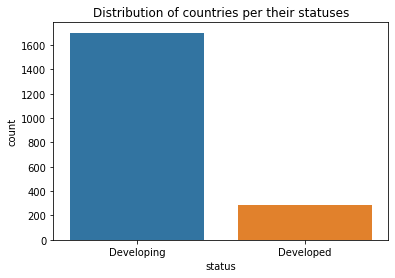

In [21]:
#Histogram of the status of different countries
ax = sns.countplot(df['status'], order = df['status'].value_counts().index)
plt.title('Distribution of countries per their statuses')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

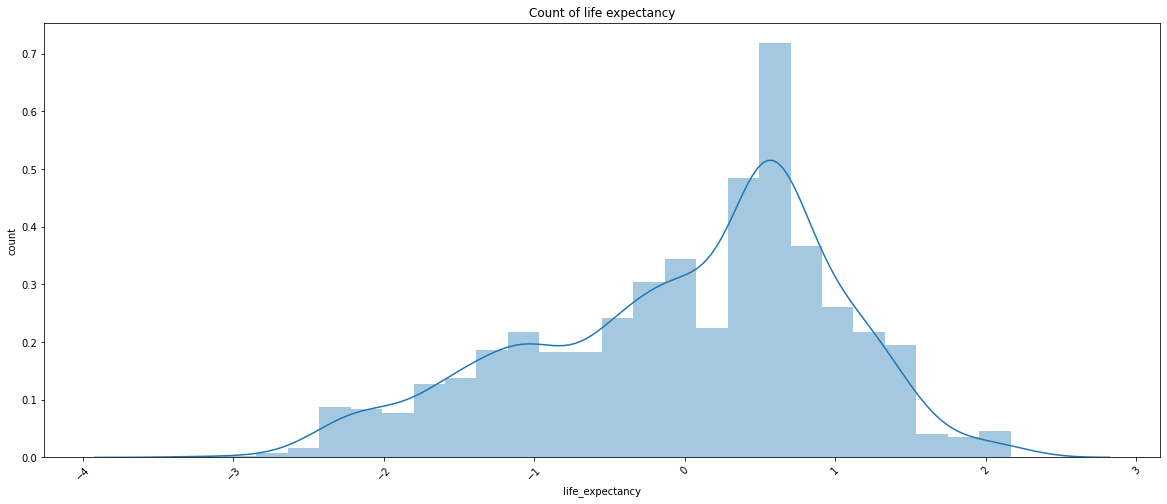

In [22]:
#Histogram of the life_expectancy of different countries
plt.figure(figsize=(20,8))
ax = sns.distplot(df['life_expectancy'])
plt.title('Count of life expectancy')
plt.xticks(rotation=45)
plt.ylabel('count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

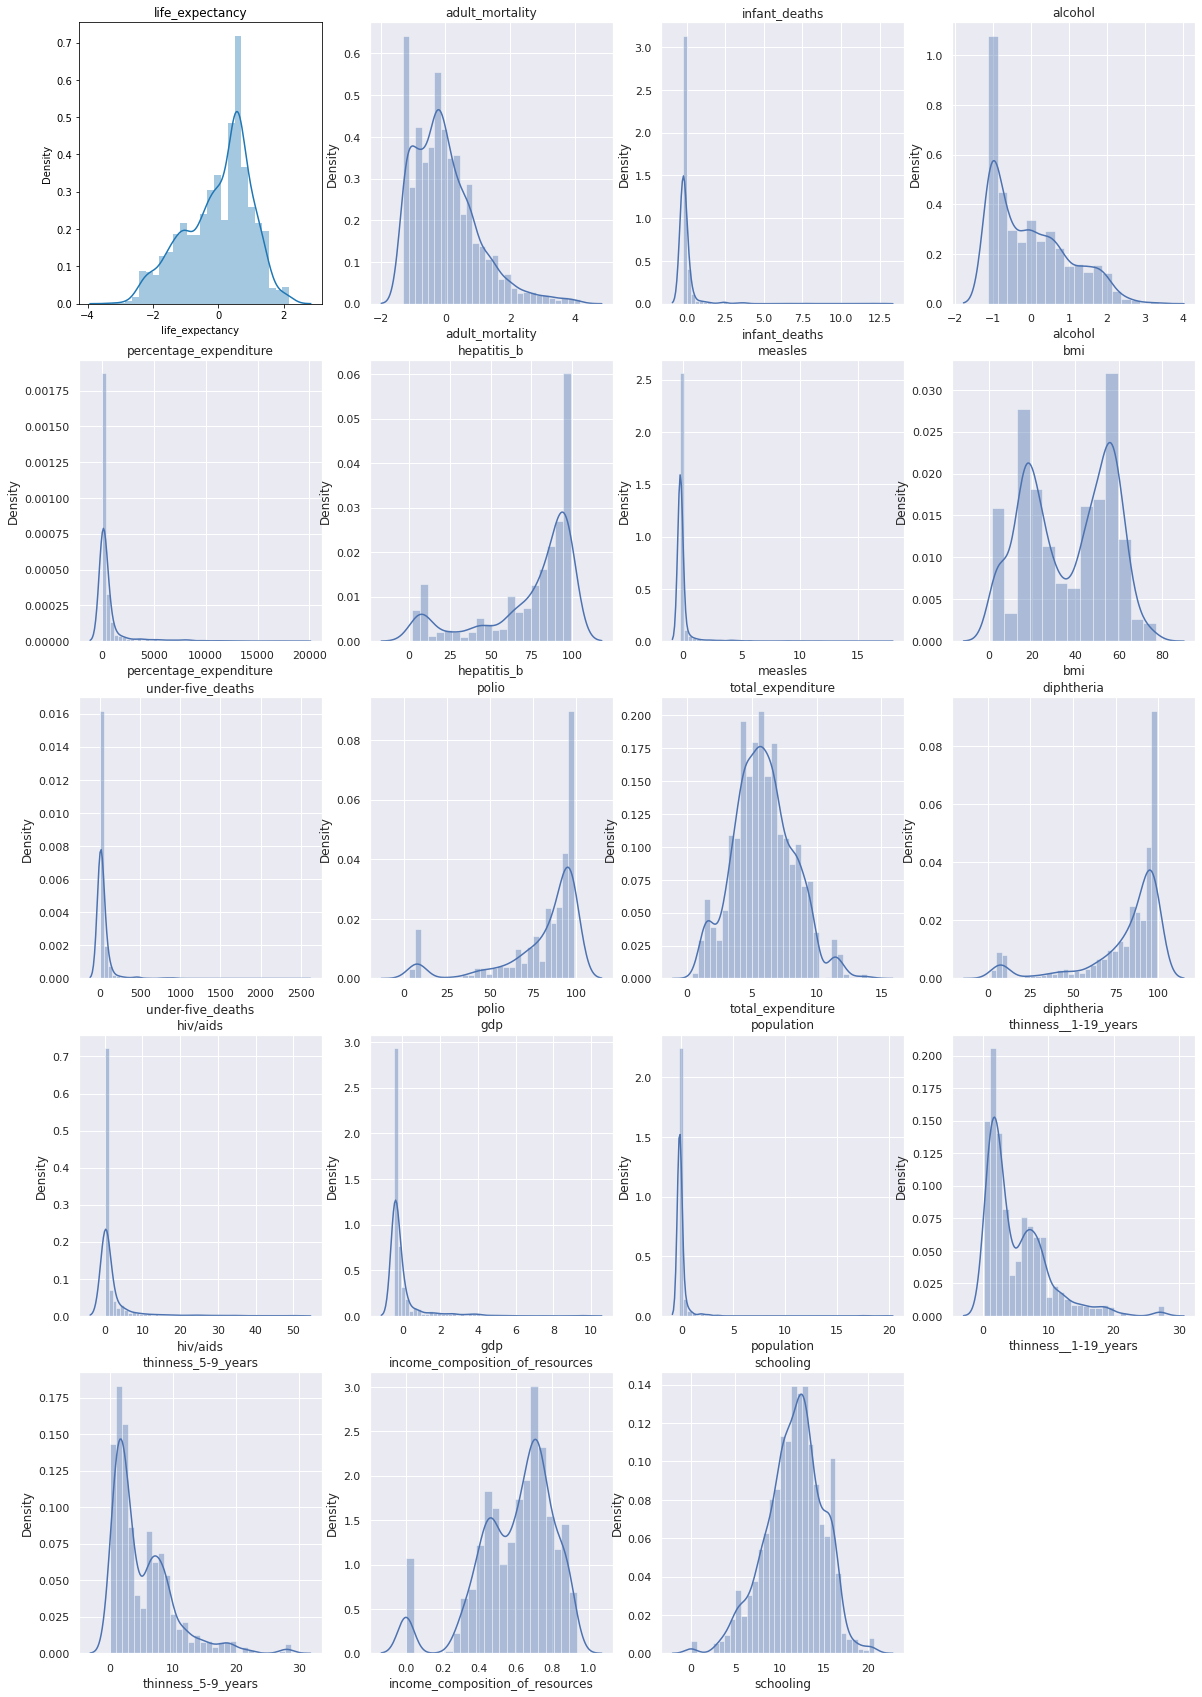

In [23]:
columns_dict={'life_expectancy': 1, 'adult_mortality': 2, 'infant_deaths': 3, 'alcohol': 4, 
                   'percentage_expenditure': 5, 'hepatitis_b': 6, 'measles': 7, 'bmi': 8, 'under-five_deaths': 9, 
                   'polio': 10, 'total_expenditure': 11, 'diphtheria': 12, 'hiv/aids': 13, 'gdp': 14, 'population': 15, 
                   'thinness__1-19_years': 16, 'thinness_5-9_years': 17, 'income_composition_of_resources': 18, 
                   'schooling': 19}

plt.figure(figsize=(20,30) )

# make a histogram plot for each variable column
for variable,i in columns_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(df[variable])
  sns.set(style='darkgrid')
  plt.title(variable)

plt.show()

In [24]:
df_skew = df.drop('year', axis = 1)

print(df_skew.skew())

life_expectancy                    -0.531505
adult_mortality                     1.140995
infant_deaths                       8.568802
alcohol                             0.695528
percentage_expenditure              4.762827
hepatitis_b                        -1.311729
measles                             8.764714
bmi                                -0.095303
under-five_deaths                   8.316159
polio                              -1.881600
total_expenditure                   0.238713
diphtheria                         -1.903185
hiv/aids                            4.544181
gdp                                 4.298171
population                         15.140323
thinness__1-19_years                1.657464
thinness_5-9_years                  1.715890
income_composition_of_resources    -1.014837
schooling                          -0.373064
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


**Findings**

- There are more developing countries than developed countries
- Most of the data appears to be normally distributed
- The columns life expectancy, hepatitis b, bmi, polio, diphteria, income composition of resources and schooling are negatively skewed to the left while the rest are positively skewed to the right


**Calculating P value**

##Bivariate Analysis

In [25]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [26]:
# pick out the columns needed to plot
needed= df.drop(['country','year'], axis=1)


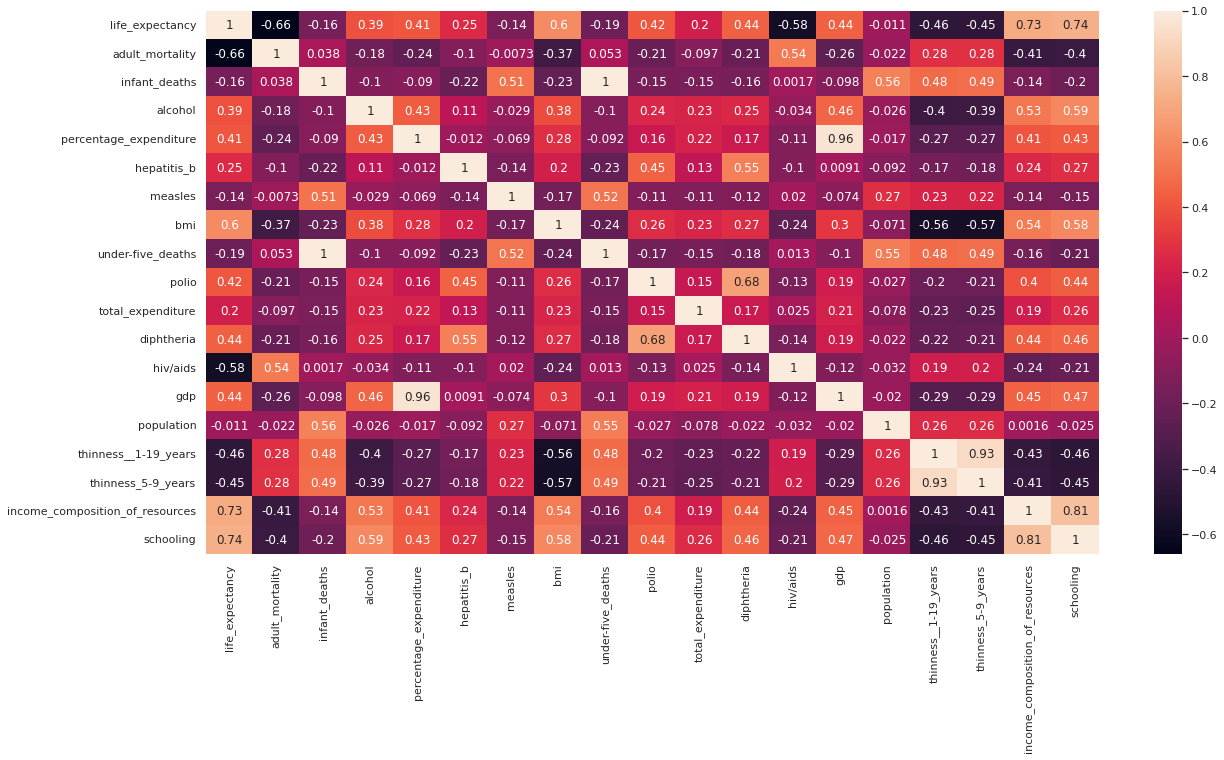

In [27]:
#Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(needed.corr(), annot=True)

- **Life expectancy:** 
 - There is a **negative correlation** between life expectancy and the following fields: adult mortality, hiv/aids and thinness of both 1-19 years and 5-9 years. 

   - This suggests that if more adults die, more infants die from hiv/aids and if more of the population is thin(from poor nutrition) life expectancy is expected to go lower

  - There is a **positive correlation** between life expectancy and the following fields: bmi, schooling and income composition of resources 

- There is a **positive correlation** between adult mortality rate and hiv/aids suggesting that most adult deaths occur from hiv/aids compared to infant deaths

- There is a **positive** correlation between infant deaths and measles, population and thinness. This suggests that most infant deaths that occur are due to measles and poor nutrition

- There is a positively high correlation between alcohol and income composition of resources and schooling. This suggests that more people who have a higher income and have schooled for more years are more prone to consuming alcohol.

- There is a very high positive correlation of 0.96 between percentage expenditure on health and gdp of a country. If a countries gdp is high, it is expected that a larger percentage is directed towards the health sector. 

- Hepatitis b is positively correlated with polio and diphteria. They are all immunizable diseases.

- BMI is positively correlated with schooling and income composition of resources and negatively correlated with thinness. Going to school ensures that a population is fed and hence improved nutrition.

# C. Building a Pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [29]:
class Removing_Outliers:
    def fit(self):pass
    def transform(self, train1):
        train1 = train1[train1['life_expectancy']>0]
        train1 = train1[train1['adult_mortality']>0]
        train1 = train1[train1['alcohol']>0]
        train1 = train1[train1['hepatitis_b']>0]
        train1 = train1[train1['bmi']>0]
        train1 = train1[train1['total_expenditure']>0]
        train1 = train1[train1['gdp']>0]
        # train1 = train1[train1['population']>0]
        train1 = train1[train1['thinness__1-19_years']>0]
        train1 = train1[train1['thinness_5-9_years']>0]
        train1 = train1[train1['income_composition_of_resources']>0]
        train1 = train1[train1['schooling']>0]
        return train1



class Features_Selection:
    def fit(self):pass
    def transform(self, train1):
        train1['key'] = pd.to_datetime(train1['key'])
        train1['pickup_datetime']  = pd.to_datetime(train1['pickup_datetime'])
        train1['year'] = train1['pickup_datetime'].dt.year
        train1['Month'] = train1['pickup_datetime'].dt.month
        train1['Date'] = train1['pickup_datetime'].dt.day
        train1['Day of Week'] = train1['pickup_datetime'].dt.dayofweek
        train1['Hour'] = train1['pickup_datetime'].dt.hour
        train1 = train1.reset_index()

        return train1

class Transform:
    def fit(self):pass
    def transform(self, train1):
        scalar = StandardScaler()
        scaled_train_data = train1
        scaled_train_data["life_expectancy"]=scalar.fit_transform(train1[["life_expectancy"]])
        scaled_train_data["adult_mortality"]=scalar.fit_transform(train1[["adult_mortality"]])
        scaled_train_data["infant_deaths"]=scalar.fit_transform(train1[["infant_deaths"]])
        scaled_train_data["alcohol"]=scalar.fit_transform(train1[["alcohol"]])
        scaled_train_data['measles']=scalar.fit_transform(train1[['measles']])
        scaled_train_data["gdp"]=scalar.fit_transform(train1[["gdp"]])
        # scaled_train_data["population"]=scalar.fit_transform(train1[["population"]])
        return scaled_train_data


pipe = Pipeline([
    ('anomaly remover', Removing_Outliers()),
    
    # ('features selection', Features_Selection()),
    ('scaler', Transform())
])

In [30]:
data = train2
data = pipe.transform(data)
print(' Resulting dataframe:', data.shape) 
data.sample(n=10)

 Resulting dataframe: (40, 22)


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2480,Suriname,2008,Developing,-0.913511,-0.268108,-0.400507,-1.356448,815.435599,84.0,-0.297692,53.3,0,85.0,5.92,85.0,1.2,-1.207108,-0.201415,3.5,3.4,0.691,11.9
2663,Trinidad and Tobago,2001,Developing,-1.244407,-0.326551,-0.400507,-1.462761,516.711248,5.0,-0.297692,34.4,1,91.0,4.40,91.0,1.2,-1.185373,-0.207393,6.6,7.1,0.715,11.8
2137,Russian Federation,2013,Developing,-0.818969,0.696205,1.365509,0.181005,1529.497771,97.0,2.405339,59.3,16,98.0,7.90,97.0,0.2,1.226885,0.011914,2.3,2.3,0.799,14.6
1350,Kazakhstan,2011,Developing,-1.528033,0.550097,0.482501,-0.895757,179.170133,99.0,-0.150926,49.9,7,99.0,4.60,99.0,0.1,0.131372,-0.206802,2.3,2.5,0.766,14.4
1532,Lithuania,2005,Developed,2.962705,0.491653,-0.400507,0.649874,913.699529,95.0,-0.296536,58.4,0,93.0,5.83,94.0,0.1,-0.925471,-0.158148,3.0,3.1,0.798,16.2
2475,Suriname,2013,Developing,-0.251718,-0.764875,-0.400507,-1.062042,1122.972967,86.0,-0.297692,57.0,0,86.0,5.96,86.0,0.4,-0.471094,-0.208518,3.5,3.5,0.719,12.7
2477,Suriname,2011,Developing,2.017287,-0.531103,-0.400507,-1.165629,989.126356,86.0,-0.297692,55.5,0,86.0,5.93,86.0,0.1,-0.797735,-0.201161,3.5,3.4,0.704,12.5
1451,Latvia,2006,Developed,1.544577,0.696205,-0.400507,0.131937,1099.248837,94.0,-0.289602,57.4,0,96.0,6.80,96.0,0.1,-0.419697,-0.175165,2.4,2.5,0.807,16.2
875,Estonia,2006,Developing,0.599159,-0.501881,-0.400507,1.816593,244.351080,95.0,-0.266489,55.9,0,95.0,5.10,95.0,0.1,0.400677,-0.207278,2.1,2.2,0.822,16.1
2656,Trinidad and Tobago,2008,Developing,-0.866240,-0.589546,-0.400507,-0.955729,1902.693048,9.0,-0.297692,4.2,0,91.0,4.40,9.0,0.3,2.808660,-0.189082,6.1,6.4,0.767,12.4


# Use of Validation Set and Cross Validation Approach

In [31]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 10)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1.         1.         1.         0.93333333 0.93333333 0.86666667
 1.         0.86666667 0.93333333 1.        ]
Average CV Score:  0.9533333333333334
Number of CV Scores used in Average:  10


# Ordinary least squares Method (OLS)

**Spplitting Data Set**

In [32]:
# import all libraries and dependencies for machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [33]:
X=df.drop(columns=['life_expectancy','country'])

y=df[['life_expectancy']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)

In [34]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 10)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1.         1.         1.         0.93333333 0.93333333 0.86666667
 1.         0.86666667 0.93333333 1.        ]
Average CV Score:  0.9533333333333334
Number of CV Scores used in Average:  10


# Models

## Building model with 1 variable

In [35]:
X_train1 = X_train['income_composition_of_resources']

In [36]:
# Add a constant
X_train1 = sm.add_constant(X_train1)

# Create a first ols model
model_1 = sm.OLS(y_train, X_train1).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [37]:
# Check parameters created
model_1.params

const                             -2.316241
income_composition_of_resources    3.802101
dtype: float64

In [38]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     1855.
Date:                Sun, 21 Aug 2022   Prob (F-statistic):          4.31e-258
Time:                        02:24:10   Log-Likelihood:                -1399.6
No. Observations:                1390   AIC:                             2803.
Df Residuals:                    1388   BIC:                             2814.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Building model with 2 variable

In [39]:
X_train2 = X_train[['income_composition_of_resources','schooling']]

In [40]:
# Add a constant
X_train2 = sm.add_constant(X_train2)

# Create second ols model
model_2 = sm.OLS(y_train, X_train2).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
# Check parameters created
model_2.params

const                             -2.779635
income_composition_of_resources    2.138827
schooling                          0.126380
dtype: float64

In [42]:
# Summary of the model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     1152.
Date:                Sun, 21 Aug 2022   Prob (F-statistic):          1.49e-295
Time:                        02:24:10   Log-Likelihood:                -1309.2
No. Observations:                1390   AIC:                             2624.
Df Residuals:                    1387   BIC:                             2640.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Building model with 3 variable

In [43]:
# Adding one more feature in regression model
X_train3 = X_train[['income_composition_of_resources','schooling', 'adult_mortality']]

In [44]:
# Add a constant
X_train3 = sm.add_constant(X_train3)

# Create third fitted model
model_3 = sm.OLS(y_train, X_train3).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [45]:
# Check parameters created
model_3.params

const                             -2.213270
income_composition_of_resources    1.596823
schooling                          0.106026
adult_mortality                   -0.383420
dtype: float64

In [46]:
# Summary of the model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     1321.
Date:                Sun, 21 Aug 2022   Prob (F-statistic):               0.00
Time:                        02:24:10   Log-Likelihood:                -1051.0
No. Observations:                1390   AIC:                             2110.
Df Residuals:                    1386   BIC:                             2131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# Kolmogorov–Smirnov test 

In [47]:
import scipy.stats as stats
stats.ttest_ind(df.loc[df['status']=='Developed','life_expectancy'],df.loc[df['status']=='Developing','life_expectancy'])

Ttest_indResult(statistic=22.924393771134888, pvalue=2.2504696584331004e-103)

# Testing

# Distribution analysis

We wish to investigate whether there is a statistically significant difference in the mean life expectancy between developing and developed countries at a significance level of 5%

Is this value greater in developed countries than in developing countries?

- Null Hypothesis, H0: the mean life expectancy equal/similar in developed and developing countries from 2000-2015
- Alternate Hypothesis, H1: the mean life expectancy is not equal in developed and developing countries(is it lower or higher)(claim)

In [48]:
# select the specific columns to investigate
df1=df[['country', 'life_expectancy', 'status', 'year', 'polio']]
df1.head()

,country,life_expectancy,status,year,polio
0,Afghanistan,-0.307275,Developing,2015,6.0
1,Afghanistan,-0.832833,Developing,2014,58.0
2,Afghanistan,-0.832833,Developing,2013,62.0
3,Afghanistan,-0.874054,Developing,2012,67.0
4,Afghanistan,-0.904969,Developing,2011,68.0


In [49]:
#Encoding the status column
df1['status'] = df1.status.map({'Developing': 0, 'Developed': 1})
print(df1.head())
#Changing the data type of status column to integer
df1['status']= df1['status'].astype(int)
#Grouping by country and status
df3=df1.groupby(['country', 'status'])['life_expectancy'].mean()
df3

       country  life_expectancy  status  year  polio
0  Afghanistan        -0.307275       0  2015    6.0
1  Afghanistan        -0.832833       0  2014   58.0
2  Afghanistan        -0.832833       0  2013   62.0
3  Afghanistan        -0.874054       0  2012   67.0
4  Afghanistan        -0.904969       0  2011   68.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


country      status
Afghanistan  0        -1.008664
Albania      0         0.739334
Algeria      0         0.567282
Angola       0        -1.977384
Argentina    0         0.731477
                         ...   
Uruguay      0         0.827657
Uzbekistan   0        -0.004306
Vanuatu      0         0.346754
Zambia       0        -1.504724
Zimbabwe     0        -1.916240
Name: life_expectancy, Length: 133, dtype: float64

In [50]:
# save the grouped data as a csv file
df3.to_csv("hypothesis.csv")
df3 = pd.read_csv("hypothesis.csv")
df3.head()

,country,status,life_expectancy
0,Afghanistan,0,-1.008664
1,Albania,0,0.739334
2,Algeria,0,0.567282
3,Angola,0,-1.977384
4,Argentina,0,0.731477


In [51]:
df3['status'].value_counts()

# there is a total of 114 developing countries and 19 developed countries in the data

0    114
1     19
Name: status, dtype: int64

In [52]:
# select only developing countries onto a new dataframe
developing = df3.loc[df3.status == 0]
developing.head()

,country,status,life_expectancy
0,Afghanistan,0,-1.008664
1,Albania,0,0.739334
2,Algeria,0,0.567282
3,Angola,0,-1.977384
4,Argentina,0,0.731477


In [53]:
# select only developed countries
developed = df3.loc[df3.status == 1]
developed.head()

,country,status,life_expectancy
6,Australia,1,1.418481
7,Austria,1,1.391001
11,Belgium,1,1.305813
18,Bulgaria,1,0.490338
32,Croatia,1,0.825596


**Sampling**

Sampling in this project did not seem to be the best option to undertake as there are few countries in our population. Sampling would reduce the size of data size to investigate and leading to inappropriate conclusions, hence we decided to work with the whole population.

## **Normality Testing**

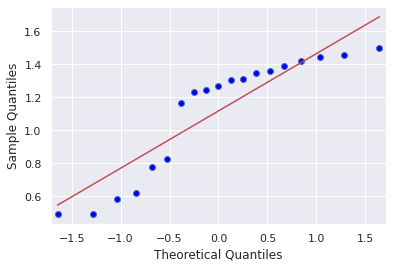

In [54]:
#Checking if the data in the developed countries is normally distributed
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(developed['life_expectancy'], line='s')
plt.show()

#It is normally distributed therefore we can perform the statistic tests.

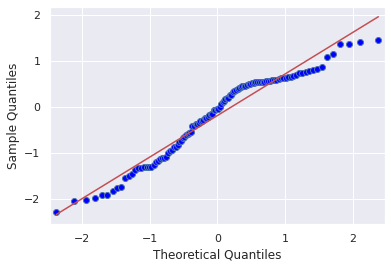

In [55]:
# normality test for the life expectancy in developing countries
qqplot(developing['life_expectancy'], line='s')
plt.show()

From both populations, the data is normally distributed about the mean 

## Statistical Testing

https://www.analyticsvidhya.com/blog/2021/06/feature-selection-using-statistical-tests/

This is a two-tailed test, using a Z statistic(since sample size > 30) and a 5% level of significance.

The critical region defined for a two-tailed z-test at 0.05 significance level is 1.960.

Therefore, Reject the null hypothesis if Z < -1.960 or is Z > 1.960.

In [56]:
# compute the means for both populations
mean_developing = developing['life_expectancy'].mean()
mean_developed = developed['life_expectancy'].mean()

print(f"The mean life expectancy of developing countries: {mean_developing}")
print(f"The mean life expectancy of developed countries: {mean_developed}")
# compute the standard deviations for both populations
s1 = developing['life_expectancy'].std()
s2 = developed['life_expectancy'].std()

# compute the count/number in each population
n1 = developing['life_expectancy'].count()
n2 = developed['life_expectancy'].count()
print(f"S1 is: {s1} while s2 is: {s2}")
print("..............")
import math

# pooled estimate of the common stadard deviation
sp = math.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2)) 

print(f"The pooled estimate of the commom stdev is: {round(sp,3)}, which is a value between {round(s1,3)} and {round(s2,3)}")
# sp is a number between the standard deviations of both stdev of both samples

The mean life expectancy of developing countries: -0.18553252915903234
The mean life expectancy of developed countries: 1.1180795072759842
S1 is: 0.9071404526470805 while s2 is: 0.3569085389198975
..............
The pooled estimate of the commom stdev is: 0.853, which is a value between 0.907 and 0.357


In [57]:
# z-score


-6.1685654840735795

The z-score is less than -1.960. It falls within the critical region defined by Z < -1.960 or is Z > 1.960.

Therefore, we reject the null hypothesis and accept the alternate hypothesis that the mean life expectancy between the developed and developing countries is different

There is enough statistical significance evidence at α=0.05 to show that there is a difference between the mean life expectancy of developed and ddeveloping countries

In [58]:
#Performing the test statistic using python's scipy stats library:

# importing libraries
from scipy import stats
from statsmodels.stats import weightstats as stests

# computing the z_test and p-value
ztest ,pval1 = stests.ztest(developing['life_expectancy'], developed['life_expectancy'], value=0,alternative='two-sided')
print(ztest, pval1)
if pval1 < 0.05:
    print("reject null hypothesis and accept the alternate hypothesis")
else:
    print("accept null hypothesis")


-6.1685654840735795 6.891231036467287e-10
reject null hypothesis and accept the alternate hypothesis


In [59]:
# difference of the two means
diff = mean_developed-mean_developing
diff

1.3036120364350166

The p-value is less than the set alpha level of 0.05. We reject the null hypothesis and accept the alternate hypothesis

Here again, we find that there is enough statistical evidence to show that there is a difference between mean of the life expectancy of developed and developing countries.

Notice that there is a difference in the two means is 1.3 which indicates a significant difference

**Conclusion:** Life expectancy in developed countries is higher than in developing countries
